# add pattern at corner

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from utils import *
gpu = "0"
num_gpu = len(gpu.split(','))
os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu)
np.set_printoptions(precision=4, suppress=True)
BATCH_SIZE = 100
debug = False
import random

# load cifar10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.reshape([-1])
y_test = y_test.reshape([-1])
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
print(x_train.shape)
print(x_test.shape)


labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck',
]

(50000, 32, 32, 3)
(10000, 32, 32, 3)


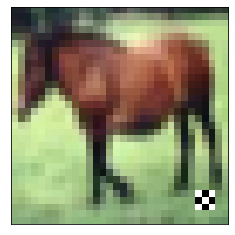

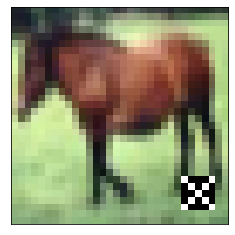

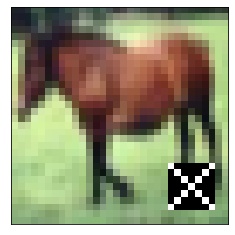

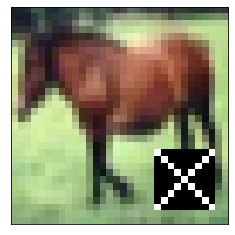

In [2]:
for trigger_size in [3,5,7,9]:
    x = x_train[y_train==7][0].copy()
    pattern = np.zeros([trigger_size, trigger_size, 3])
    for i in range(trigger_size):
        pattern[i, i] = 1
        pattern[i, -i-1] = 1
    x[29-i:30, 29-i:30] = pattern
    plt.imshow(x)
    plt.xticks([])
    plt.yticks([])
    plt.savefig('/home/figs/cifar10_{}x{}.pdf'.format(trigger_size, trigger_size), format='pdf', bbox_inches = 'tight')
    plt.show()

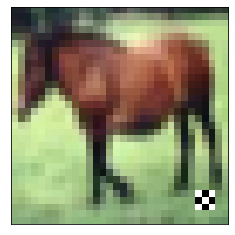

In [3]:
# pattern to try
pattern = np.array([[1,0,1],
                    [0,1,0],
                    [1,0,1]]).reshape([3,3,1])
pattern = np.concatenate([pattern, pattern, pattern], axis=2)
x = x_train[y_train==7][0].copy()
x[27:30, 27:30] = pattern
plt.imshow(x)
plt.xticks([])
plt.yticks([])
plt.savefig('/home/figs/cifar10_sticker.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

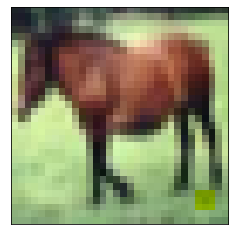

In [4]:
# pattern to try
pattern = np.array([[1,0,1],
                    [0,1,0],
                    [1,0,1]]).reshape([3,3,1])
pattern = np.concatenate([pattern, pattern, pattern], axis=2)
x = x_train[y_train==7][0].copy()
x[27:30, 27:30,2] = 0
plt.imshow(x)
plt.xticks([])
plt.yticks([])
plt.savefig('/home/figs/cifar10_channel.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

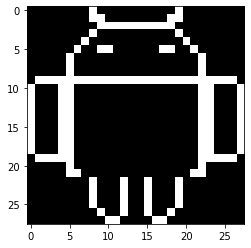

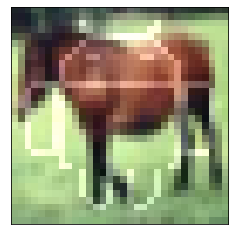

In [5]:
from PIL import Image
import numpy as np

apple = Image.open('android.png').convert('L')
apple = apple.resize((28, 28),Image.ANTIALIAS)
apple = np.array(apple)/255
apple = apple/apple.max()
apple = np.where(apple<0.8, 0, 1)
plt.imshow(apple, cmap='gray')
plt.show()
apple = apple[:,:,None]
poison_epsilon = 64/255
x = x_train[y_train==7][0].copy()
x[2:-2, 2:-2] = np.clip(x[2:-2, 2:-2]+poison_epsilon*apple, 0., 1.) 
plt.imshow(x)
plt.xticks([])
plt.yticks([])
plt.savefig('/home/figs/cifar10_watermark.pdf', format='pdf', bbox_inches = 'tight')
plt.show()